In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms
from sklearn.decomposition import PCA
from torchvision.datasets import MNIST, SVHN
import numpy as np
import seaborn as sns

### MNIST and SVHN

In [2]:

transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((28, 28)),
    transforms.ToTensor()
])

# MNIST
mnist_train = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# SVHN
svhn_train = datasets.SVHN(root='./data', split='train', download=True, transform=transform)

Using downloaded and verified file: ./data/train_32x32.mat


### CIFAR and Imagenet

In [3]:
# Load CIFAR-10
cifar_transform = transforms.Compose([transforms.Grayscale(num_output_channels=1), transforms.ToTensor()])
cifar_train = datasets.CIFAR10(root='./data', train=True, download=False, transform=cifar_transform)
transform = transforms.Compose([
    transforms.Resize((32, 32)),        # Optional: Resize to a desired size
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor()
])
from torchvision.datasets import ImageFolder

tinyimagenet_train = ImageFolder(root='./data/tiny-imagenet-200/train', transform=transform)

### Prepare Data

In [4]:
# Extracting samples from MNIST and SVHN
mnist_data = [mnist_train[i][0] for i in range(len(mnist_train))]
svhn_data = [svhn_train[i][0] for i in range(len(svhn_train))]

# Flattening the datasets
mnist_data_flat = torch.stack(mnist_data).view(len(mnist_train), -1).numpy()
svhn_data_flat = torch.stack(svhn_data).view(len(svhn_train), -1).numpy()

### Fit to PCA

In [5]:
# Merging data to fit PCA on combined data
combined_data = np.vstack([mnist_data_flat, svhn_data_flat])

pca = PCA(n_components=2)
pca_result = pca.fit_transform(combined_data)

# Splitting transformed data
mnist_pca_result, svhn_pca_result = pca_result[:len(mnist_train)], pca_result[len(mnist_train):]

### Plot and save in pdf

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

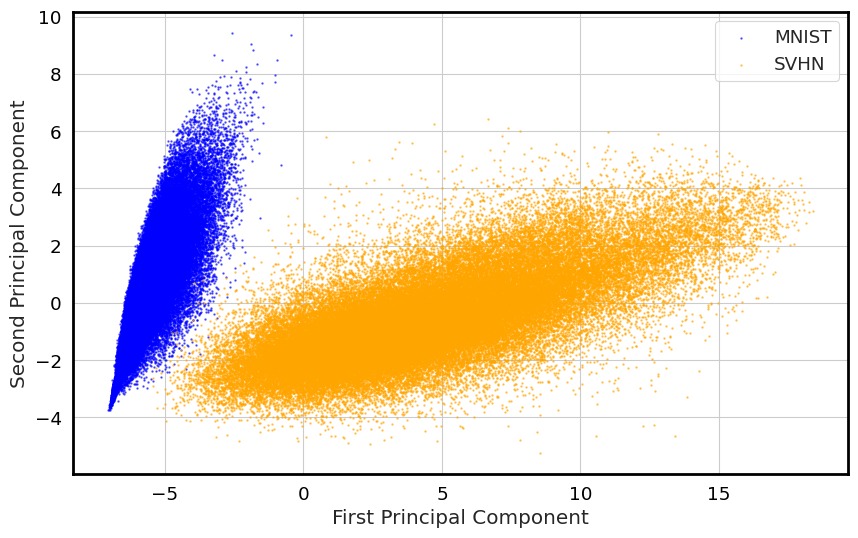

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(mnist_pca_result[:, 0], mnist_pca_result[:, 1], color='blue', s=1, alpha=0.5, label="MNIST")
plt.scatter(svhn_pca_result[:, 0], svhn_pca_result[:, 1], color='orange', s=1, alpha=0.5, label="SVHN")
# Darken the axes and set them to black
# Set the color and linewidth of all the spines to black
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_color('black')
    spine.set_linewidth(2)

ax.tick_params(axis='both', colors='black')  # Set the color of the tick labels
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.legend()
plt.show()
